# data exploration
load data

In [1]:
import pandas as pd

file_path = 'data.csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"'{file_path}' was not found.")
except Exception as e:
    print(f"error: {e}")

              key                                               text  \
0   389-exception  In addition, as a special exception, Red Hat, ...   
1  3com-microcode  Redistribution and use in source and binary fo...   
2    3dslicer-1.0  3D Slicer Contribution and Software License Ag...   
3      4suite-1.1  License and copyright info for 4Suite software...   
4     996-icu-1.0  "Anti 996" License Version 1.0 (Draft)\n\nPerm...   

           category  
0  Copyleft Limited  
1        Permissive  
2        Permissive  
3        Permissive  
4   Free Restricted  


**sanity check**

In [9]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

## text column

In [10]:
df["text"].isna().sum()

np.int64(21)

In [2]:
df["text_len"] = df["text"].str.split().str.len()

df["text_len"].describe()

count     2594.000000
mean      1005.510794
std       1414.717455
min          8.000000
25%        157.000000
50%        363.000000
75%       1366.750000
max      13307.000000
Name: text_len, dtype: float64

heavy skew in text length

<Axes: >

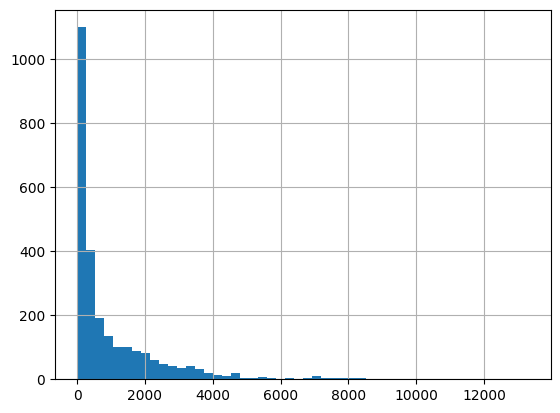

In [3]:
df["text_len"].hist(bins=50)

**vocab size**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

df = df[df["text"].str.len() > 0]

vec = CountVectorizer(stop_words="english", max_features=5000)
X = vec.fit_transform(df["text"])

len(vec.get_feature_names_out())

5000

## category distribution

In [4]:
df["category"].value_counts()

category
Permissive          970
Proprietary Free    623
Copyleft Limited    407
Copyleft            176
Commercial          137
Free Restricted     101
Source-available     98
Public Domain        40
CLA                  22
Patent License       21
Unstated License     20
Name: count, dtype: int64

also heavy skew here as well

<Axes: title={'center': 'text_len'}, xlabel='category'>

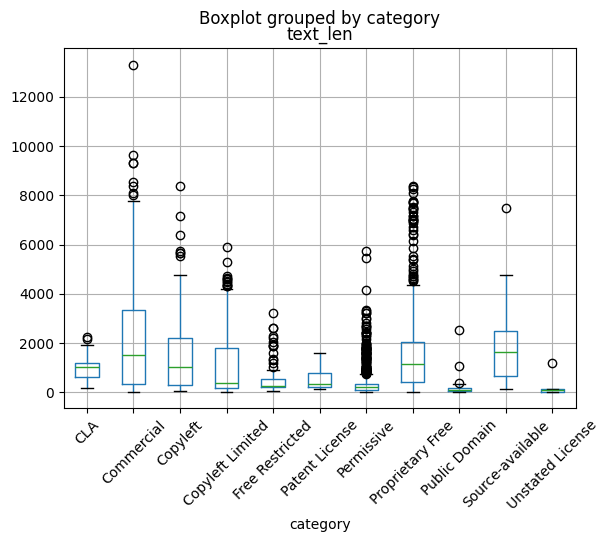

In [7]:
df.groupby("category")["text_len"].mean().sort_values()
df.boxplot(column="text_len", by="category", rot=45)

In [12]:
df.groupby("category")["text_len"].mean().sort_values()

category
Public Domain        198.051282
Unstated License     247.333333
Permissive           359.643963
Free Restricted      534.120000
Patent License       540.047619
CLA                  986.571429
Copyleft Limited    1120.926290
Proprietary Free    1547.316720
Copyleft            1550.298851
Source-available    1685.857143
Commercial          2273.773723
Name: text_len, dtype: float64

some categories need their text lengths to be balanced more than others